# Cluster based on spending score in mall useing Kmeans algoritham

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
customer = pd.read_csv(r"C:\Users\ad min\Desktop\ML\Mall_Customers.csv")

In [3]:
customer

CustomerID  Gender  Age   AI  SS
0             1    Male   19   15  39
1             2    Male   21   15  81
2             3  Female   20   16   6
3             4  Female   23   16  77
4             5  Female   31   17  40
..          ...     ...  ...  ...  ..
195         196  Female   35  120  79
196         197  Female   45  126  28
197         198    Male   32  126  74
198         199    Male   32  137  18
199         200    Male   30  137  83

[200 rows x 5 columns]

In [4]:
print("List of the Columns".center(50,'-'))
for column in customer.columns:
    print(column)

---------------List of the Columns----------------
CustomerID
Gender
Age
AI
SS


In [5]:
customer.head()

CustomerID  Gender  Age  AI  SS
0           1    Male   19  15  39
1           2    Male   21  15  81
2           3  Female   20  16   6
3           4  Female   23  16  77
4           5  Female   31  17  40

In [6]:
customer.tail()

CustomerID  Gender  Age   AI  SS
195         196  Female   35  120  79
196         197  Female   45  126  28
197         198    Male   32  126  74
198         199    Male   32  137  18
199         200    Male   30  137  83

In [7]:
customer.describe()

CustomerID         Age          AI          SS
count  200.000000  200.000000  200.000000  200.000000
mean   100.500000   38.850000   60.560000   50.200000
std     57.879185   13.969007   26.264721   25.823522
min      1.000000   18.000000   15.000000    1.000000
25%     50.750000   28.750000   41.500000   34.750000
50%    100.500000   36.000000   61.500000   50.000000
75%    150.250000   49.000000   78.000000   73.000000
max    200.000000   70.000000  137.000000   99.000000

In [8]:
customer.duplicated().sum()

np.int64(0)

In [9]:
customer.drop_duplicates(inplace=True)

In [10]:
customer.isnull().sum()

CustomerID    0
Gender        0
Age           0
AI            0
SS            0
dtype: int64

In [11]:
sb.boxplot(x=customer.AI)
plt.show()

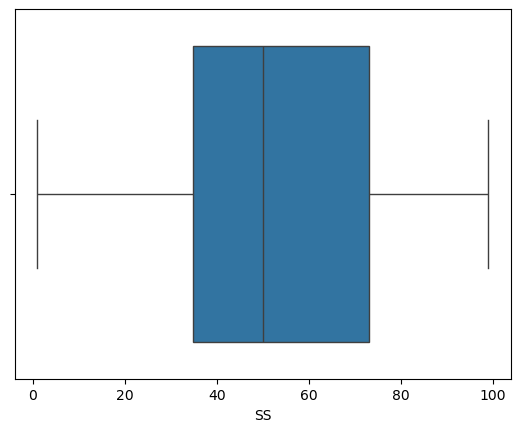

In [12]:
sb.boxplot(x=customer["SS"])
plt.show()

In [13]:
customer = customer.iloc[:,3:5]

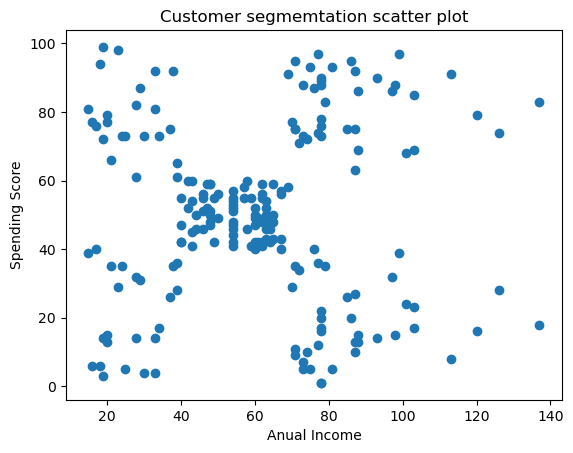

In [14]:
plt.scatter(customer.AI,customer.SS)
plt.title("Customer segmemtation scatter plot")
plt.xlabel("Anual Income")
plt.ylabel("Spending Score")
plt.show()

In [15]:
Kmean = KMeans(n_clusters=5)

In [16]:
Kmean.fit(customer)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [17]:
labels = Kmean.labels_

In [18]:
customer["Labels"]=pd.DataFrame(labels)

In [19]:
centroids = Kmean.cluster_centers_

In [20]:
centroids 

array([[ 78.48275862,  18.20689655],
       [ 86.53846154,  82.12820513],
       [ 26.30434783,  20.91304348],
       [ 48.07070707,  56.64646465],
       [109.7       ,  22.        ]])

In [21]:
centroids[:,0]

array([ 78.48275862,  86.53846154,  26.30434783,  48.07070707,
       109.7       ])

In [22]:
centroids[:,1]

array([18.20689655, 82.12820513, 20.91304348, 56.64646465, 22.        ])

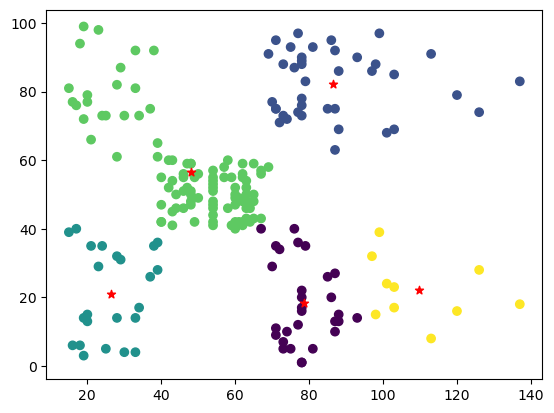

In [23]:
plt.scatter(customer.AI,customer.SS,c=labels)
plt.scatter(centroids[:,0],centroids[:,1],c="red",marker="*")
plt.show()